In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel("../data/Superstore.xlsx")

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
# group
customer_data = df.groupby("Customer Name").agg({
    "Sales": "sum",
    "Quantity": "sum",
    "Discount": "mean"
}).reset_index()

customer_data.head()

,Customer Name,Sales,Quantity,Discount
0,Aaron Bergman,886.156,13,0.066667
1,Aaron Hawkins,1744.700,54,0.090909
2,Aaron Smayling,3050.692,48,0.355000
3,Adam Bellavance,7755.620,56,0.044444
4,Adam Hart,3250.337,75,0.135000


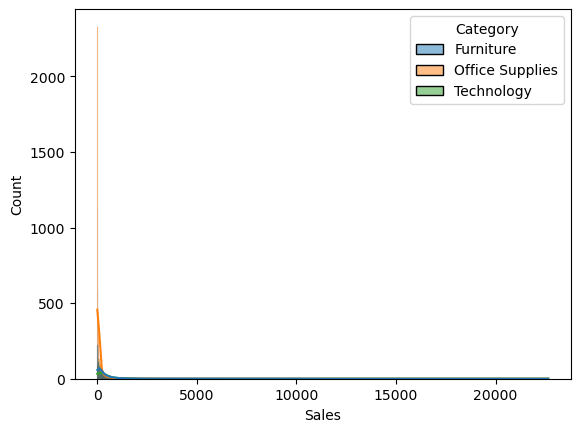

In [11]:
sns.histplot(data=df, x='Sales', hue='Category', kde=True)
plt.savefig("../visuals/sales-hist.png")
plt.show()

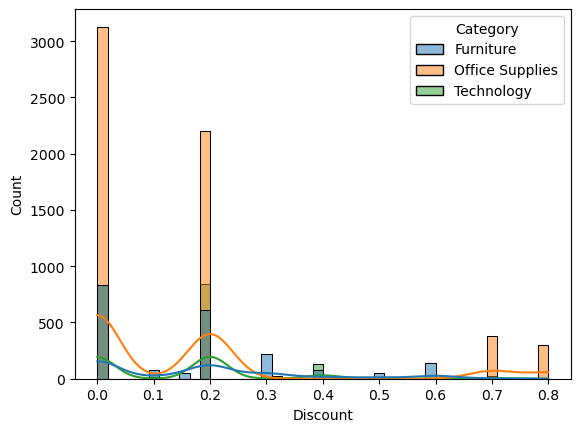

In [10]:
sns.histplot(data=df, x='Discount', hue='Category', kde=True)
plt.savefig("../visuals/discount-hist.png")
plt.show()

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
customer_data["Segment"] = kmeans.fit_predict(customer_data[["Sales", "Quantity", "Discount"]])

customer_data.head()

C:\Users\Raina Khan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


,Customer Name,Sales,Quantity,Discount,Segment
0,Aaron Bergman,886.156,13,0.066667,0
1,Aaron Hawkins,1744.700,54,0.090909,0
2,Aaron Smayling,3050.692,48,0.355000,2
3,Adam Bellavance,7755.620,56,0.044444,1
4,Adam Hart,3250.337,75,0.135000,2


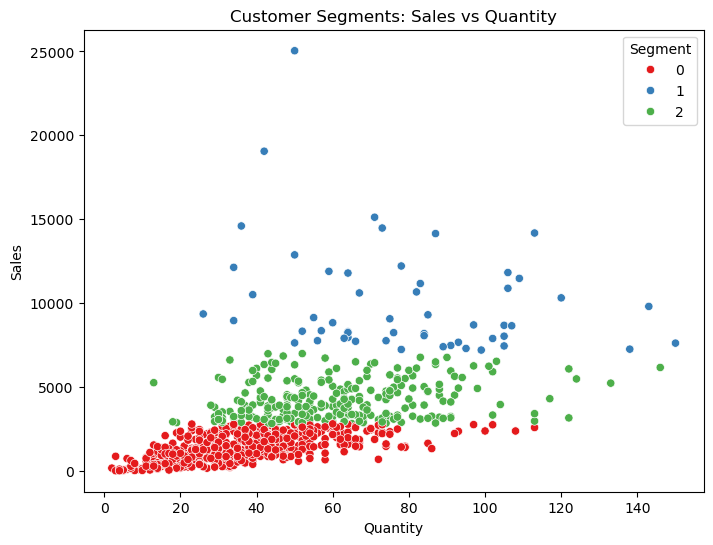

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=customer_data, x="Quantity", y="Sales", hue="Segment", palette="Set1")
plt.title("Customer Segments: Sales vs Quantity")
plt.savefig("../visuals/customer_segments.png")
plt.show()